In [2]:
import pandas as pd
from matplotlib import pyplot as plt

from ccb.experiment import parse_results
from ccb.experiment.retrieve_runs import retrieve_runs

%load_ext autoreload
%autoreload 2

In [4]:
# directory where all the sweeps experiments are logged
classification_dir =  '/mnt/data/experiments/nils/new_classification_sweeps'
segmentation_dir =  '/mnt/data/experiments/nils/new_segmentation_sweeps'

df = retrieve_runs(classification_dir)

plt.rcParams['figure.figsize'] = [40, 40]

df_1x = df[(df["partition_name"] == "1.00x_train")]
parse_results.plot_all_models_datasets(df_1x)
plt.tight_layout()


AttributeError: module 'ccb.experiment.parse_results' has no attribute 'plot_all_sweeps'

geolifeclef-2022


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


eurosat
brick_kiln_v1.0
so2sat
pv4ger_classification
bigearthnet
forestnet_v1.0


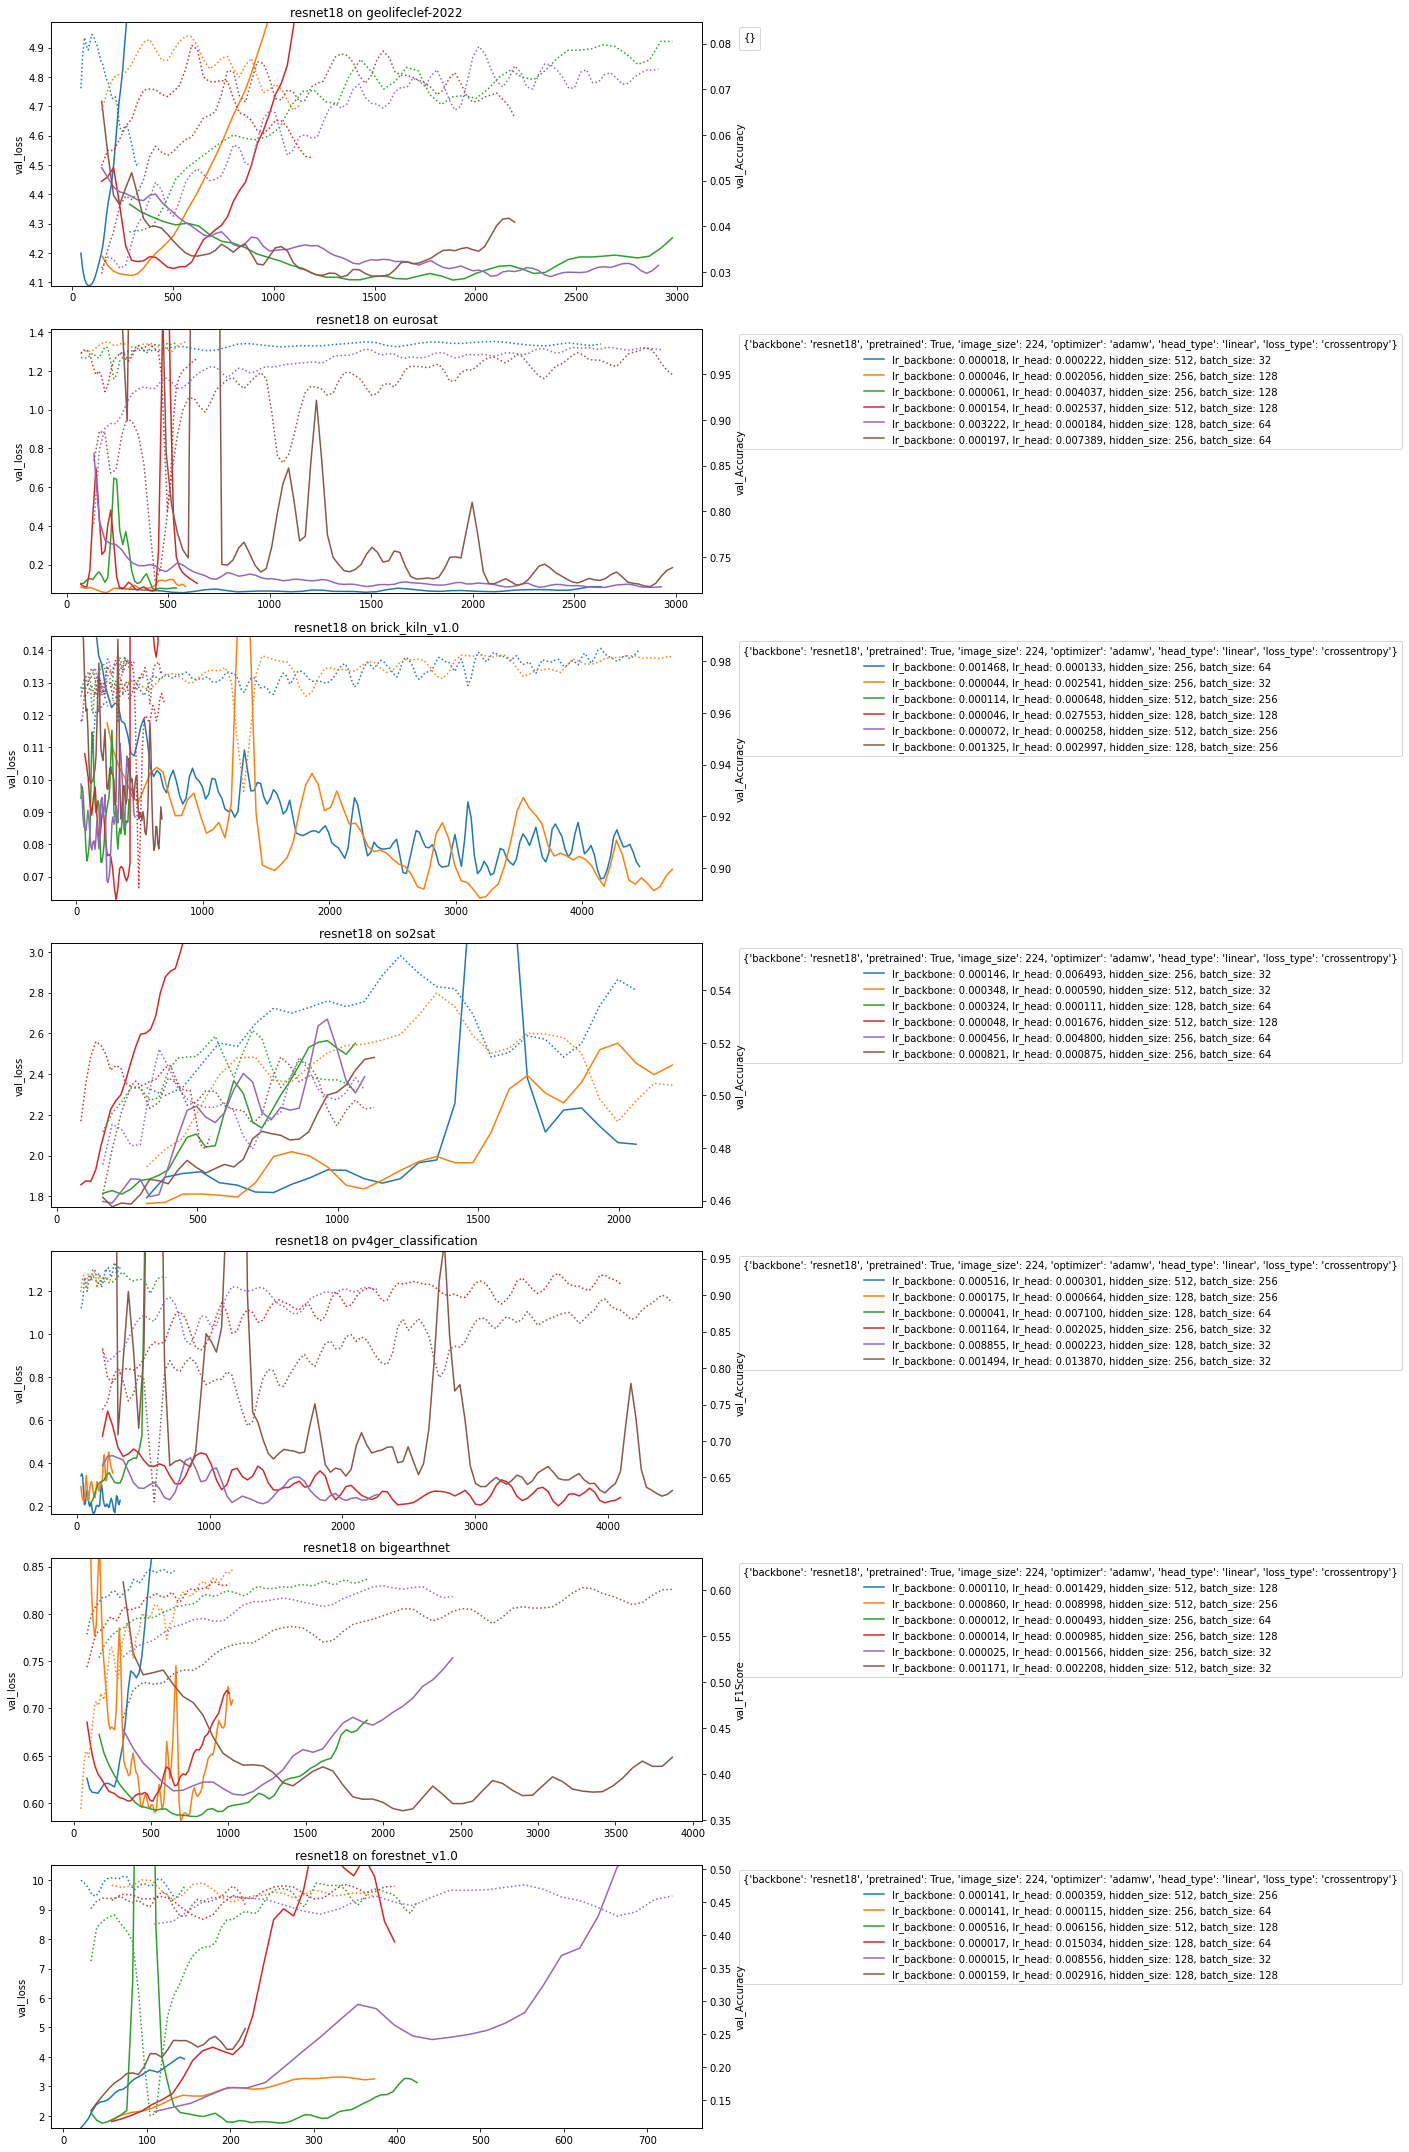

In [5]:
sweep_results_path = "/mnt/data/experiments/nils/classification_results/sweep_results_2022-07-20_11-24-05.csv"
df = pd.read_csv(sweep_results_path)
plt.rcParams['figure.figsize'] = [20, 30]

df_1x = df[(df["partition_name"] == "1.00x_train")]
parse_results.plot_all_datasets(df_1x, model="resnet18")
plt.tight_layout()
